## IRIS FLOWER CLASSIFICATION

**1. Importing Required Libraries**

Essential libraries are imported for data manipulation, visualization, and machine learning tasks. These tools will facilitate efficient analysis and model development.

In [8]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn. model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**2. Importing and Convering Dataset to DataFrame**

The iris dataset is loaded using Scikit-learn's 'load_iris' function and converted into a DataFrame. This transformation allows for easy manipulation and analysis of the dataset.

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

In [12]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
df = pd.DataFrame(iris.data, columns = iris.feature_names, copy = True)
df['Species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**4. Renaming Species & Columns**

Species labels are renamed for clarity, and columns are relabeled for easier reference throughout the analysis. This step enhances the interpretability of the dataset.

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
#renaming Species
df['Species'].replace({0:'setosa',1:'versicolor',2:'virginica'}, inplace = True)

#renaming Columns
df.columns = ['SL','SW','PL','PW','Species']
df.head()

,SL,SW,PL,PW,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


---
## Exploratory Data Analysis (EDA) - Structure & Statistics
---

Exploratory Data Analysis (EDA) reveals crucial information about the dataset's structure and statistics. Insights gained here will guide subsequent modeling decisions.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       150 non-null    float64
 1   SW       150 non-null    float64
 2   PL       150 non-null    float64
 3   PW       150 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

Based on the DataFrame information, we observe that the dataset consists of 150 entries, with each entry representing an individual iris flower. The data is evenly distributed among the three species—setosa, versicolor, and virginica—each comprising 50 entries. 

---
## DATA VISUALIZATION
---

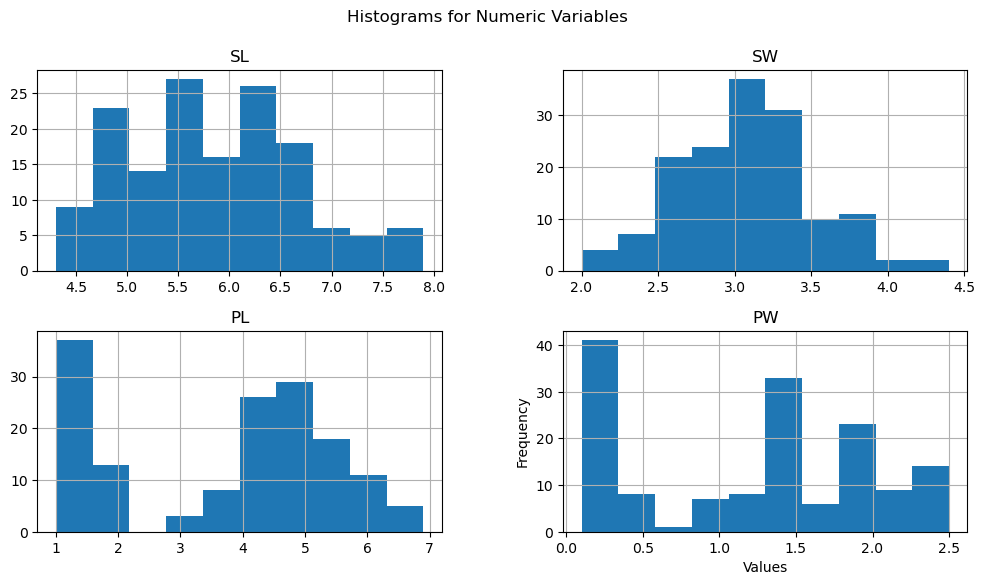

In [23]:
df.hist(column=['SL','SW','PL','PW'], bins=10, figsize=(12,6))

#set plot labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.suptitle('Histograms for Numeric Variables')

plt.show()

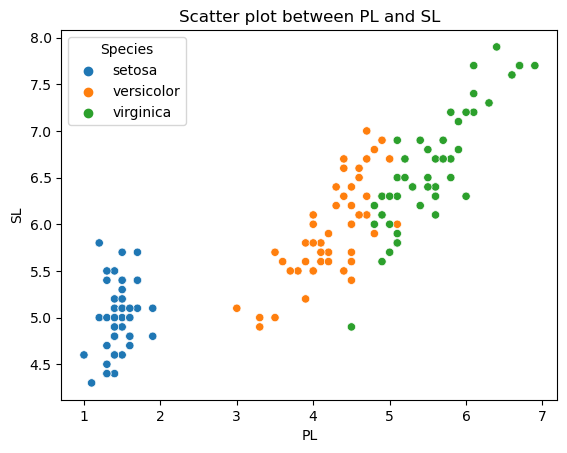

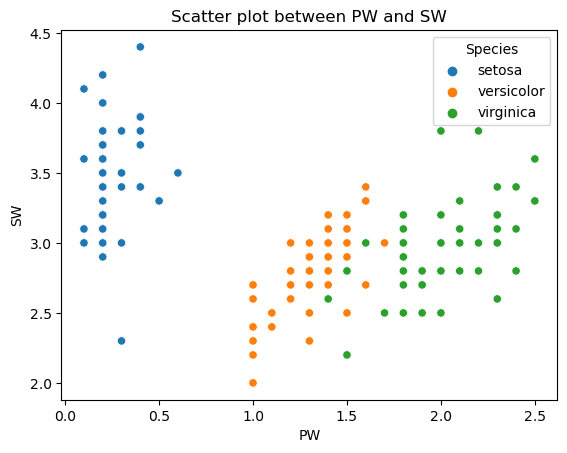

In [24]:
#creating a scatter plot 

sns.scatterplot(data=df, x='PL', y='SL', hue='Species')
plt.title('Scatter plot between PL and SL')
plt.show()

sns.scatterplot(data=df, x='PW', y='SW', hue='Species')
plt.title('Scatter plot between PW and SW')
plt.show()

---
## BUILDING MODEL
---

A logistic regression model is trained using the training data. This step involves creating a predictive model based on the identified patterns in the iris dataset

In [25]:
train, test = train_test_split(df, test_size=0.4, random_state=0)

print('Shape of traing data:', train.shape)
print('Shape of testing data:', test.shape)

Shape of traing data: (90, 5)
Shape of testing data: (60, 5)


In [29]:
x_train = train.drop(columns=['Species'], axis=1)
y_train = train['Species']

In [31]:
x_test = train.drop(columns=['Species'], axis=1)
y_test = train['Species']

In [27]:
model = LogisticRegression(max_iter=150)
model.fit(x_train, y_train)

LogisticRegression(max_iter=150)

In [32]:
y_predict = model.predict(x_test)
print('Predict Values on test data', y_predict)

Predict Values on test data ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica' 'virginica'
 'virginica' 'virginica' 'setosa' 'setosa' 'virginica' 'virginica'
 'setosa' 'virginica' 'setosa' 'virginica' 'virginica' 'setosa' 'setosa'
 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica'
 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'versicolor' 'setosa' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica' 'setosa' 'setosa'
 'virginica' 'setosa' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'virginica' 'virginica' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'setosa' 'setosa' '

---
## Model Evaluation - Metrics & Analysis
---

The model is evaluated using key metrics such as accuracy, confusion matrix, and classification report. These metrics provide a comprehensive understanding of the model's performance on the test data.

In [43]:
print('Accuracy Score on test data: %.2f'%accuracy_score(y_test, y_predict))

Accuracy Score on test data: 0.98


In [44]:
conf_matrix = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[34  0  0]
 [ 0 25  2]
 [ 0  0 29]]


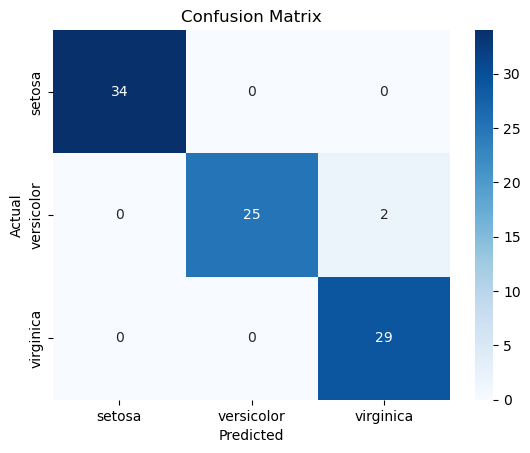

In [46]:
#creating heatmap for confusion matrix

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [47]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       1.00      0.93      0.96        27
   virginica       0.94      1.00      0.97        29

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



**Summary of Model Evaluation:**

The model evaluation phase provides valuable insights into the performance of the logistic regression model on the test data. Here are the key observations:

1. **Accuracy Score:**
   - The model achieves an impressive accuracy score of 98%, indicating its ability to correctly classify iris flowers into their respective species.

2. **Confusion Matrix:**
   - The confusion matrix reveals a high level of accuracy for each species:
      - Setosa: **34** correct predictions, **0** misclassifications
      - Versicolor: **25** correct predictions, **2** misclassifications
      - Virginica: **29** correct predictions, **0** misclassifications
   - The model shows robust performance across all three iris species.

3. **Classification Report:**
   - The classification report further supports the model's effectiveness:
      - Precision, Recall, and F1-score are high for each species.
      - Setosa achieves perfect scores **(1.00)** for precision, recall, and F1-score.
      - Versicolor and Virginica also exhibit strong metrics, with slight variations.
   - The weighted average **F1-score** is **0.98**, emphasizing the overall model's accuracy.

4. **Overall Observation:**
   - The logistic regression model demonstrates excellent discriminatory power in distinguishing between different iris species based on sepal and petal characteristics.
   - The high accuracy and robust metrics across all species indicate the model's reliability in real-world applications.

In conclusion, the model exhibits strong performance, showcasing its ability to accurately classify iris flowers. This outcome suggests that the selected features (sepal length, sepal width, petal length, and petal width) are effective in differentiating between iris species.